In [1]:
import numpy as np
import pandas as pd
from scipy import stats, signal
from matplotlib.pyplot import *

%matplotlib inline

In [190]:
def get_mag(d):
    mag= np.sqrt(np.array(d.x**2+d.y**2+d.z**2))
    b, a = signal.butter(1, 1.0/(Fs/2), btype='low')
    mag = signal.lfilter(b, a, mag)[100:-100]
    return mag

(45, array([-0.02469883, -0.0269633 , -0.02078301,  0.01566573,  0.10127814,
         0.22826538,  0.34914223,  0.39850167,  0.33931975,  0.20879898,
         0.08024181, -0.01738745, -0.08350596, -0.12322217, -0.14695993,
        -0.16061589, -0.17244026, -0.19046645, -0.21344068, -0.23316737,
        -0.24095202, -0.22752801, -0.18758915, -0.12134191, -0.03396063,
         0.05576275,  0.12392936,  0.1544853 ,  0.14312613,  0.10328035,
         0.05343001,  0.0051208 , -0.03280945, -0.05499099, -0.06280622,
        -0.05683491, -0.0382558 , -0.01367879,  0.01050523,  0.02812497,
         0.03528504,  0.03252601,  0.02123937,  0.00547938, -0.00910923]))

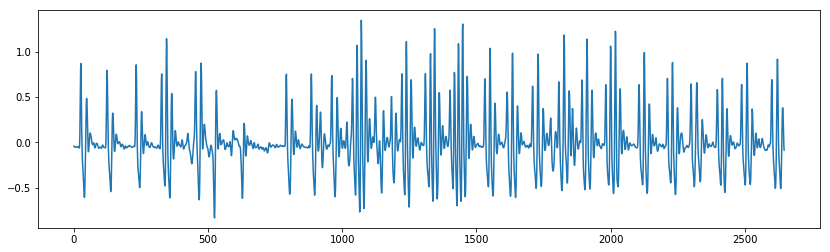

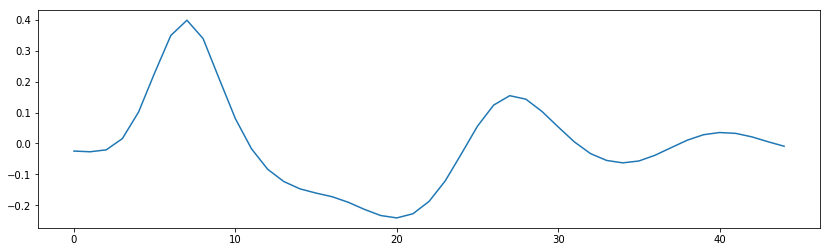

In [191]:
d = pd.read_csv('../data_accel/accurate_belly_4.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
mag = get_mag(d)
mag = mag - np.mean(mag)

figure(figsize=(14,4))
plot(mag)

test = mag[225:270]
test = test - np.mean(test)
test = test / np.linalg.norm(test)

norm = np.ones(len(test))
norm /= np.linalg.norm(norm)

figure(figsize=(14,4))
plot(test)

(len(test), test)

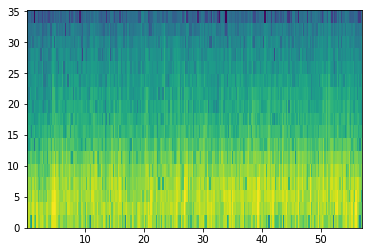

In [192]:
d = pd.read_csv('../data_accel/false_pos_driving_1.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
mag = get_mag(d)
mag -= np.mean(mag)
_ = specgram(mag, Fs=Fs, NFFT=32, noverlap=16)

In [193]:
b,a = signal.butter(1, 0.5/(Fs/2), 'low')

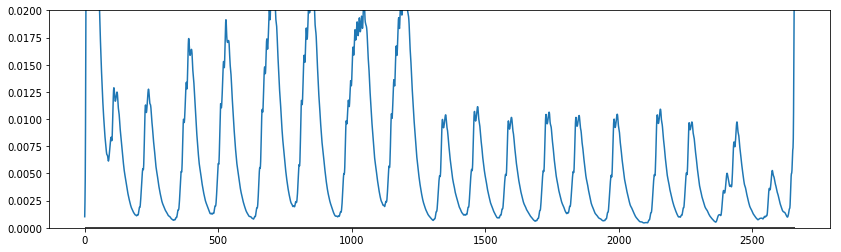

In [194]:
d = pd.read_csv('../data_accel/accurate_belly_3.csv')
mag = get_mag(d)
s = signal.convolve(mag, test[::-1], mode='same')
s2 = signal.convolve(mag, norm, mode='same')
s = signal.lfilter(b,a,np.abs(s/s2))
figure(figsize=(14,4))
plot(s)
ylim(0,0.02)
hlines(0, 0, len(s))

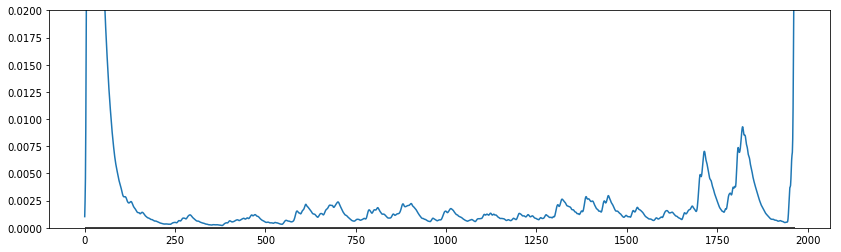

In [197]:
d = pd.read_csv('../data_accel/false_pos_rest_1.csv')
mag = get_mag(d)
s = signal.convolve(mag, test[::-1], mode='same')
s2 = signal.convolve(mag, norm, mode='same')
s = signal.lfilter(b,a,np.abs(s/s2))
figure(figsize=(14,4))
plot(s)
ylim(0,0.02)
hlines(0, 0, len(s))

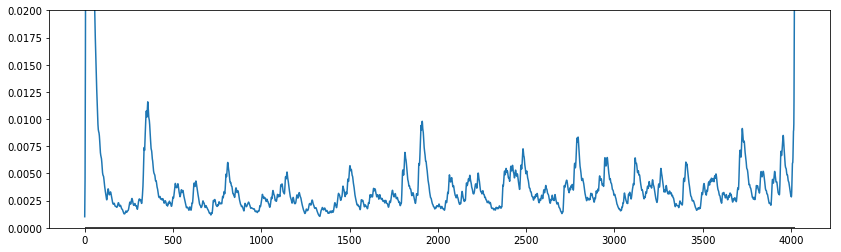

In [196]:
d = pd.read_csv('../data_accel/false_pos_driving_1.csv')
mag = get_mag(d)
s = signal.convolve(mag, test[::-1], mode='same')
s2 = signal.convolve(mag, norm, mode='same')
s = signal.lfilter(b,a,np.abs(s/s2))
figure(figsize=(14,4))
plot(s)
ylim(0,0.02)
hlines(0, 0, len(s))